# Import modules

In [1]:
import sys
from unipath import Path

# append codelib to sys path ~ will only work if this jupyter notebook path is sys.path[0]
p = Path(sys.path[0])
codelib_path = str(p.parent + Path('\\codelib'))
sys.path.insert(0, codelib_path)

# import codelib
from helpers import *
from enhanced_portfolio_optimization import *

# other modules
import numpy as np
import matplotlib.pyplot as plt

# Import data

In [86]:
# setting dates
start = "1980-01-01"
end   = "2022-01-01"
port  = "5_Industry_Portfolios"

# pulling data
df = pdr.famafrench.FamaFrenchReader(port, start, end).read()[0]
df = df.replace(-99.99,0) # replace nan values
df = df / 100 # changing format to decimals

# risk free rate
rf = 0.0001

# returns in array
ret = df.to_numpy()

# Example: Shrinkage of 0.1

In [87]:

arr = np.empty([int(0.5 * len(ret))+1, 10])
idx = 0
for shrink in np.linspace(0,1,10):

    shr = shrink

    starting_period = int(0.5 * len(ret))

    shr_returns = []

    for period in range(starting_period, len(ret)):

        # current instance of returns
        return_series = ret[0:period,]
        exp_returns = np.mean(return_series, axis=0)
        rf = rf
        ledoit_wolf=False
        shrinkage=shr

        inst_ret = np.sum(tangency_portfolio_weights(exp_returns, return_series, rf, ledoit_wolf, shrinkage) * ret[period])
        shr_returns.append(inst_ret)

    cum_return = (1 + pd.Series(shr_returns)).cumprod()
    
    arr[:,idx] = cum_return
    idx += 1
    

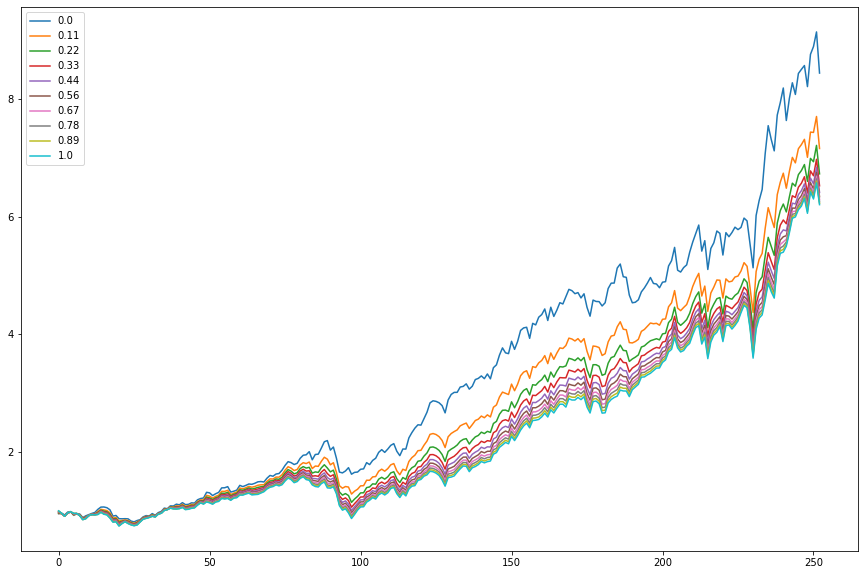

In [92]:
fig = plt.figure(figsize=(15,10))

for elem in range(0,10):
    
    y_values = arr[:,elem]
    plt.plot(y_values, label=str(round(np.linspace(0,1,10)[elem], 2)))

plt.legend()